<a href="https://colab.research.google.com/github/DallasAutumn/datawhale_salons/blob/master/PyTorch_s8_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch 实现基础线性回归和梯度下降

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


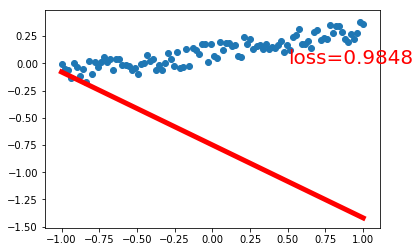

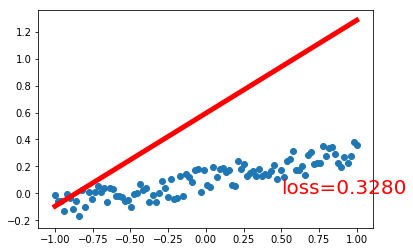

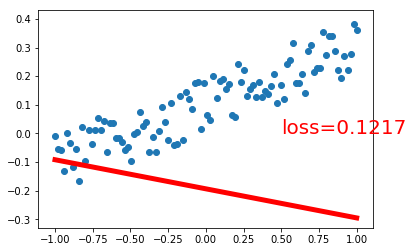

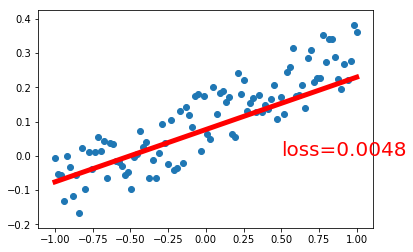

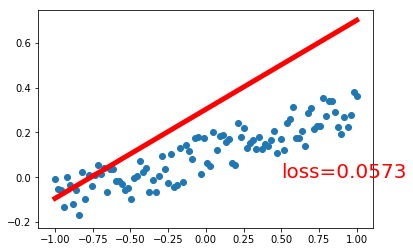

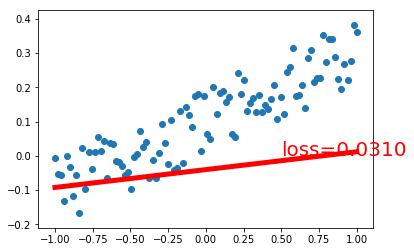

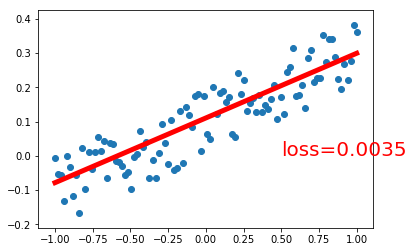

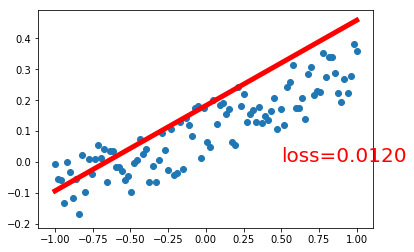

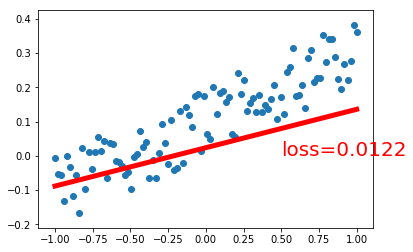

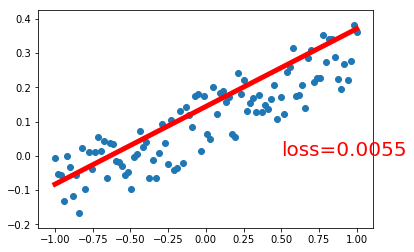

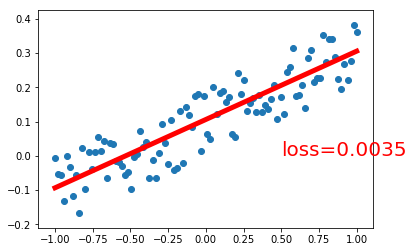

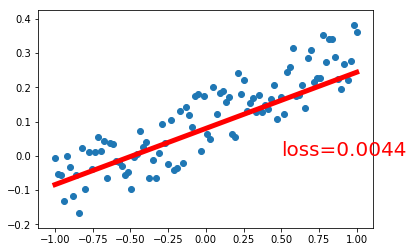

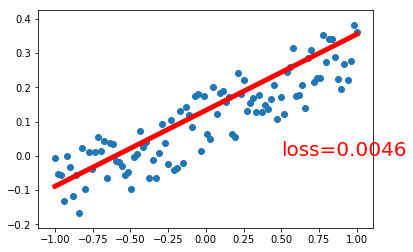

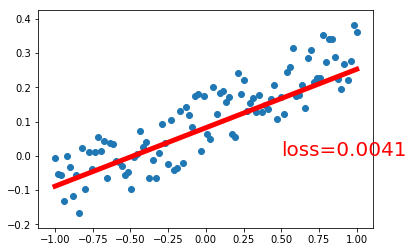

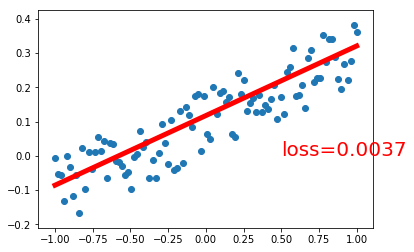

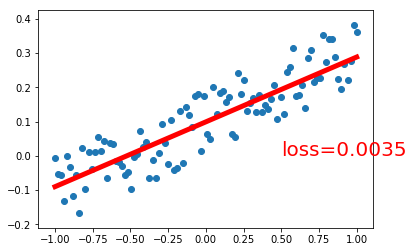

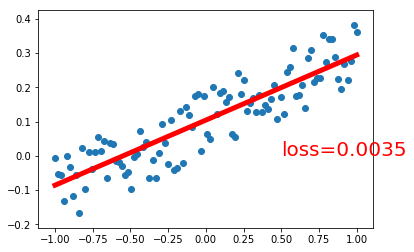

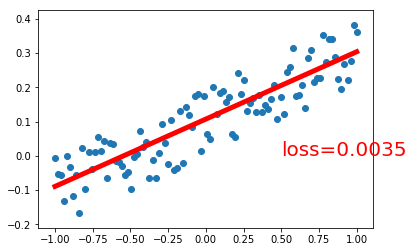

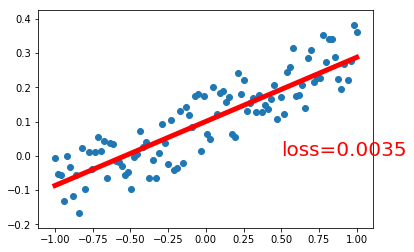

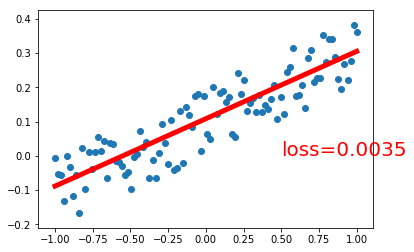

In [4]:
#%matplotlib inline

from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

device = torch.device('cpu')
#device = torch.device('cuda')

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = 0.2*x + 0.2*torch.rand(x.size())
x = x.to(device)
y = y.to(device)

BATCH_SIZE = 4
torch_dataset = TensorDataset(x, y)
loader = DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

# class Net(torch.nn.Module):
#     def __init__(self, n_features, n_hidden, n_output):
#         super(Net, self).__init__()
#         self.hidden = torch.nn.Linear(n_features, n_hidden)
#         self.predict = torch.nn.Linear(n_hidden, n_output)

#     def forward(self, x):
#         x = F.relu(self.hidden(x))
#         x = self.predict(x)
#         return x

# n_input = 1
# n_hidden = 10
# n_output = 1
# net = Net(n_input, n_hidden, n_output).to(device)
# print(net)

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        out = self.linear(x)
        return out

net = LinearRegression().to(device)
print(net)

plt.ion()

learning_rate = 0.5
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
loss_func = torch.nn.MSELoss()

epochs = 100
for epoch in range(epochs):
    prediction = net(x)
    loss = loss_func(prediction, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 5 == 0:
        #plt.cla()
        fig, ax = plt.subplots()
        ax.scatter(x.data.numpy(), y.data.numpy())
        ax.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        ax.text(0.5, 0, "loss=%.4f" % loss.item(), fontdict={'size':20, 'color':'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()